# Importing

In [1]:
import string
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from nltk.corpus import stopwords
from nltk import word_tokenize, RegexpTokenizer, TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
# nltk.download('punkt')

from matplotlib import cm
from imblearn.over_sampling import ADASYN
from gensim.models import Word2Vec

pd.set_option('max_colwidth', None)

In [2]:
df = pd.read_excel('twitterdata.xlsx', sheet_name='Tweet')
userid = pd.read_excel('twitterdata.xlsx', sheet_name='User', index_col='UserID')

# Cleaning

In [3]:
# Re-naming so they are more manageable

df.columns = ['tweetid', 'weekday', 'hour', 'day', 'lang', 'isreshare', 'reach', 'retweetcount', 'likes', 'klout', 'sentiment', 'text', 'locationid', 'userid']

In [4]:
# Majority of tweets are in english.

df = df[df['lang'] == 'en']

In [5]:
# We want to only work with a few sentiment values.

# df['sentiment'].value_counts(normalize=True).head(15)

In [6]:
# Removing null values as they mess up code

df.dropna(inplace=True)
# df.drop_duplicates(inplace=True, subset=['text'])

In [7]:
# df['sentiment'].value_counts(normalize=True).head(15)

In [8]:
# Removing rows that do not have the values we want.

sentimentlist = [0.0, 1.0, 2.0, 3.0, -1.0, -2.0]
df = df.loc[df.sentiment.isin(sentimentlist)]

In [9]:
# df['sentiment'].value_counts(normalize=True)

# Subdivide tweet text

We want to remove links from the tweets to make it easier to tokenize the actual tweets. However we want to keep the links, should they exist for a tweet.

In [10]:
df['links'] = df['text'].str.findall(r'(http\S+)')
df['username'] = df['text'].str.findall(r'(@\S+)')
df['hashtags'] = df['text'].str.findall(r'(#\S+)')

# Tokenizing

In [11]:
stopwords_list = stopwords.words('english')
stopwords_list += ['aws', 'rt', 'amazon', 'awscloud', 'cloud']
# stopwords_list += under5.keys()

In [12]:
tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
lem = WordNetLemmatizer()

In [13]:
def clean_tweets(tweets_list, lemmatizer=None, tokenizer=None, stopwords_list=None):  
    data = []
    for tweet in tweets_list:
        t = []
        tweet = tokenizer.tokenize(tweet)
        for i in tweet:
            i = i.strip('#')
            i = lemmatizer.lemmatize(i)
            if i.isalnum() == True and i not in stopwords_list:
                t.append(i)
        data.append(t)
    return data

In [14]:
df['data'] = clean_tweets(df['text'], lem, tokenizer, stopwords_list)
df['strings'] = [' '.join(i) for i in df['data']]

In [15]:
alldata = [item for elem in df['data'] for item in elem]
alldata

['hiring',
 'senior',
 'software',
 'engineer',
 'proto',
 'job',
 'job',
 'protocol',
 'networking',
 'mediastreaming',
 'true',
 'web',
 'service',
 'php',
 'html',
 'html5',
 'cs',
 'webdesign',
 'seo',
 'java',
 'javascript',
 'htt',
 'devops',
 'engineer',
 'ansible',
 'cassandra',
 'mysql',
 'ubuntu',
 'ruby',
 'rail',
 'job',
 'austin',
 'tx',
 'austin',
 'tx',
 'job',
 'jobsearch',
 'happy',
 'new',
 'year',
 'instance',
 'hiring',
 'sr',
 'international',
 'tax',
 'manager',
 'seattle',
 'apply',
 'job',
 'bc',
 'limit',
 'test',
 'prod',
 'isolated',
 'region',
 'else',
 'dev',
 'could',
 'impact',
 'prod',
 'lambda',
 'beyond',
 'isolating',
 'dev',
 'prod',
 'envs',
 'like',
 'difficult',
 'bc',
 'service',
 'availability',
 'really',
 'good',
 'way',
 'around',
 'problem',
 'isolation',
 'account',
 'level',
 'would',
 'work',
 'alludes',
 'pg',
 '17',
 'make',
 'identity',
 'management',
 'difficult',
 'red',
 'line',
 'v',
 'green',
 'line',
 'reporting',
 'vital',
 'res

In [16]:
# count = {}
# for i in alldata:
#     if i in count:
#         count[i] += 1
#     else:
#         count[i] = 1
# over5 = {}
# under5 = {}
# for k, v in count.items():
#     if v >= 5 and len(k) > 1:
#         over5[k] = v
#     else:
#         under5[k] = v
# print(len(over5))
# print(len(under5))
# over5

In [17]:
word_set = list(set(alldata))

In [18]:
word_set.sort()

In [19]:
word_set

['0',
 '00',
 '000',
 '00012887',
 '00017123421',
 '004',
 '0045',
 '00824ffaa70',
 '00http',
 '01',
 '01233',
 '01494618764',
 '015',
 '01803',
 '01m13s',
 '020116au',
 '02081663888',
 '021416au',
 '021416tw',
 '022',
 '022d0',
 '03',
 '030716au',
 '030716tw',
 '032816au',
 '03582',
 '039',
 '03aa',
 '0487',
 '04c912d08f0',
 '04ik8y',
 '05d4603e067',
 '0600',
 '073',
 '07508811304',
 '07738846689',
 '079',
 '079698http',
 '09',
 '09062',
 '0915hrs',
 '09386756',
 '0a1',
 '0a12',
 '0a3',
 '0a4',
 '0a5',
 '0aws',
 '0b19987e',
 '0da',
 '0e45',
 '0e607',
 '0ee9c',
 '0f',
 '0fee3',
 '0o3kk',
 '0vt6nl',
 '0x01',
 '0xe4c5',
 '1',
 '10',
 '100',
 '1000',
 '1000location',
 '1000th',
 '1000v',
 '1000x',
 '1001',
 '100b',
 '100gb',
 '100k',
 '100kpa',
 '100m',
 '100mb',
 '100million',
 '100usd',
 '100x',
 '100yrs',
 '101',
 '1015',
 '1016',
 '1017',
 '102km',
 '103',
 '105',
 '106',
 '10634',
 '106room',
 '107',
 '109',
 '109th',
 '10a5b',
 '10am',
 '10b',
 '10bln',
 '10bn',
 '10daystilteam',
 '

In [20]:
print(len(df['data']))
print(len(alldata))

85955
674238


In [21]:
total_vocab = []
for word in alldata:
    if word not in total_vocab:
        total_vocab.append(word)
len(total_vocab)

24487

In [22]:
# data_freqdist = FreqDist(alldata)
# data_freqdist.most_common(20)

In [23]:
# mostcommonwords20 = data_freqdist.most_common(20)

# plt.figure(figsize=(16, 10))
# plt.bar(range(len(mostcommonwords20)), [val[1] for val in mostcommonwords20], align='center')
# plt.xticks(range(len(mostcommonwords20)), [val[0] for val in mostcommonwords20])
# plt.xticks(rotation=70)
# plt.ylabel('Number of times the word appears')
# plt.title('Top 20 most common words')
# plt.show()

# EDA for all sentiment types

In [24]:
# dfsent0 = df[df['sentiment'] == 0.0]

# datasent0 = clean_tweets(dfsent0['text'], lem, tokenizer, stopwords_list)

# alldatasent0 = [item for elem in datasent0 for item in elem]

# data_freqdistsent0 = FreqDist(alldatasent0)
# data_freqdistsent0.most_common(20)

In [25]:
# mostcommonwords20sent0 = data_freqdistsent0.most_common(20)

# plt.figure(figsize=(16, 10))
# plt.bar(range(len(mostcommonwords20sent0)), [val[1] for val in mostcommonwords20sent0], align='center')
# plt.xticks(range(len(mostcommonwords20sent0)), [val[0] for val in mostcommonwords20sent0])
# plt.xticks(rotation=70)
# plt.ylabel('Number of times the word appears')
# plt.title('Top 20 most common words for Sentiment 0')
# plt.show()

In [26]:
# dfsent1 = df.loc[df['sentiment'] == 1.0]

# datasent1 = clean_tweets(dfsent1['text'], lem, tokenizer, stopwords_list)

# alldatasent1 = [item for elem in datasent1 for item in elem]

# data_freqdistsent1 = FreqDist(alldatasent1)
# data_freqdistsent1.most_common(20)

In [27]:
# mostcommonwords20sent1 = data_freqdistsent1.most_common(20)

# plt.figure(figsize=(16, 10))
# plt.bar(range(len(mostcommonwords20sent1)), [val[1] for val in mostcommonwords20sent1], align='center')
# plt.xticks(range(len(mostcommonwords20sent1)), [val[0] for val in mostcommonwords20sent1])
# plt.xticks(rotation=70)
# plt.ylabel('Number of times the word appears')
# plt.title('Top 20 most common words for Sentiment 1')
# plt.show()

In [28]:
# dfsent2 = df.loc[df['sentiment'] == 2.0]

# datasent2 = clean_tweets(dfsent2['text'], lem, tokenizer, stopwords_list)

# alldatasent2 = [item for elem in datasent2 for item in elem]

# data_freqdistsent2 = FreqDist(alldatasent2)
# data_freqdistsent2.most_common(20)

In [29]:
# mostcommonwords20sent2 = data_freqdistsent2.most_common(20)

# plt.figure(figsize=(16, 10))
# plt.bar(range(len(mostcommonwords20sent2)), [val[1] for val in mostcommonwords20sent2], align='center')
# plt.xticks(range(len(mostcommonwords20sent2)), [val[0] for val in mostcommonwords20sent2])
# plt.xticks(rotation=70)
# plt.ylabel('Number of times the word appears')
# plt.title('Top 20 most common words for Sentiment 2')
# plt.show()

In [30]:
# dfsent3 = df.loc[df['sentiment'] == 3.0]

# datasent3 = clean_tweets(dfsent3['text'], lem, tokenizer, stopwords_list)

# alldatasent3 = [item for elem in datasent3 for item in elem]

# data_freqdistsent3 = FreqDist(alldatasent3)
# data_freqdistsent3.most_common(20)

In [31]:
# mostcommonwords20sent3 = data_freqdistsent3.most_common(20)

# plt.figure(figsize=(16, 10))
# plt.bar(range(len(mostcommonwords20sent3)), [val[1] for val in mostcommonwords20sent3], align='center')
# plt.xticks(range(len(mostcommonwords20sent3)), [val[0] for val in mostcommonwords20sent3])
# plt.xticks(rotation=70)
# plt.ylabel('Number of times the word appears')
# plt.title('Top 20 most common words for Sentiment 3')
# plt.show()

In [32]:
# dfsentneg1 = df.loc[df['sentiment'] == -1.0]

# datasentneg1 = clean_tweets(dfsentneg1['text'], lem, tokenizer, stopwords_list)

# alldatasentneg1 = [item for elem in datasentneg1 for item in elem]

# data_freqdistsentneg1 = FreqDist(alldatasentneg1)
# data_freqdistsentneg1.most_common(20)

In [33]:
# mostcommonwords20sentneg1 = data_freqdistsentneg1.most_common(20)

# plt.figure(figsize=(16, 10))
# plt.bar(range(len(mostcommonwords20sentneg1)), [val[1] for val in mostcommonwords20sentneg1], align='center')
# plt.xticks(range(len(mostcommonwords20sentneg1)), [val[0] for val in mostcommonwords20sentneg1])
# plt.xticks(rotation=70)
# plt.ylabel('Number of times the word appears')
# plt.title('Top 20 most common words for Sentiment -1')
# plt.show()

In [34]:
# dfsentneg2 = df.loc[df['sentiment'] == -2.0]

# datasentneg2 = clean_tweets(dfsentneg2['text'], lem, tokenizer, stopwords_list)

# alldatasentneg2 = [item for elem in datasentneg2 for item in elem]

# data_freqdistsentneg2 = FreqDist(alldatasentneg2)
# data_freqdistsentneg2.most_common(20)

In [35]:
# mostcommonwords20sentneg2 = data_freqdistsentneg2.most_common(20)

# plt.figure(figsize=(16, 10))
# plt.bar(range(len(mostcommonwords20sentneg2)), [val[1] for val in mostcommonwords20sentneg2], align='center')
# plt.xticks(range(len(mostcommonwords20sentneg2)), [val[0] for val in mostcommonwords20sentneg2])
# plt.xticks(rotation=70)
# plt.ylabel('Number of times the word appears')
# plt.title('Top 20 most common words for Sentiment -2')
# plt.show()

# Preprocessing

In [36]:
# import gender from another sheet

gender = userid.to_dict()
df['gender'] = df['userid'].map(gender['Gender'])
genders = {'Female':2, 'Male':1, 'Unisex':3, 'Unknown':0}
df['gender'] = df['gender'].map(genders)

In [37]:
# label encode to numerical values

weekdays = {'Sunday':1, 'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5, 'Friday':6, 'Saturday':7}
df['weekday'] = df['weekday'].map(weekdays)

In [38]:
# df['link'] = np.where(df['links']==True, 1,0)

In [39]:
df.head()

,tweetid,weekday,hour,day,lang,isreshare,reach,retweetcount,likes,klout,sentiment,text,locationid,userid,links,username,hashtags,data,strings,gender
0,tw-682712873332805633,5,17.0,31.0,en,0.0,44.0,0.0,0.0,35.0,0.0,We are hiring: Senior Software Engineer - Proto http://www.reqcloud.com/jobs/719865/?k=0LaPxXuFwczs1e32ZURJKrgCIDMQtRO7BquFSQthUKY&utm_source=twitter&utm_campaign=reqCloud_JobPost #job @awscloud #job #protocol #networking #aws #mediastreaming,3751.0,tw-40932430,[http://www.reqcloud.com/jobs/719865/?k=0LaPxXuFwczs1e32ZURJKrgCIDMQtRO7BquFSQthUKY&utm_source=twitter&utm_campaign=reqCloud_JobPost],[@awscloud],"[#job, #job, #protocol, #networking, #aws, #mediastreaming]","[hiring, senior, software, engineer, proto, job, job, protocol, networking, mediastreaming]",hiring senior software engineer proto job job protocol networking mediastreaming,2
1,tw-682713045357998080,5,17.0,31.0,en,1.0,1810.0,5.0,0.0,53.0,2.0,RT @CodeMineStatus: This is true Amazon Web Services https://aws.amazon.com/ #php #html #html5 #css #webdesign #seo #java #javascript htt,3989.0,tw-3179389829,[https://aws.amazon.com/],[@CodeMineStatus:],"[#php, #html, #html5, #css, #webdesign, #seo, #java, #javascript]","[true, web, service, php, html, html5, cs, webdesign, seo, java, javascript, htt]",true web service php html html5 cs webdesign seo java javascript htt,1
2,tw-682713219375476736,5,17.0,31.0,en,0.0,282.0,0.0,0.0,47.0,0.0,Devops Engineer Aws Ansible Cassandra Mysql Ubuntu Ruby On Rails Jobs in Austin TX #Austin #TX #jobs #jobsearch https://www.jobfindly.com/devops-engineer-aws-ansible-cassandra-mysql-ubuntu-ruby-on-rails-jobs-austin-tx.html,3741.0,tw-4624808414,[https://www.jobfindly.com/devops-engineer-aws-ansible-cassandra-mysql-ubuntu-ruby-on-rails-jobs-austin-tx.html],[],"[#Austin, #TX, #jobs, #jobsearch]","[devops, engineer, ansible, cassandra, mysql, ubuntu, ruby, rail, job, austin, tx, austin, tx, job, jobsearch]",devops engineer ansible cassandra mysql ubuntu ruby rail job austin tx austin tx job jobsearch,1
3,tw-682713436967579648,5,17.0,31.0,en,0.0,2087.0,4.0,0.0,53.0,0.0,Happy New Year to all those AWS instances of ours!,3753.0,tw-356447127,[],[],[],"[happy, new, year, instance]",happy new year instance,3
4,tw-682714048199311366,5,17.0,31.0,en,0.0,953.0,0.0,0.0,47.0,0.0,Amazon is hiring! #Sr. #International Tax Manager - AWS in #Seattle apply now! #jobs http://neuvoo.com/job.php?id=dsvkrujig3&source=twitter&lang=en&client_id=658&l=Seattle%20Washington%20US&k=Sr.%20International%20Tax%20Manager%20-%20AWS http://twitter.com/NeuvooAccSea/status/682714048199311366/photo/1,3751.0,tw-3172686669,"[http://neuvoo.com/job.php?id=dsvkrujig3&source=twitter&lang=en&client_id=658&l=Seattle%20Washington%20US&k=Sr.%20International%20Tax%20Manager%20-%20AWS, http://twitter.com/NeuvooAccSea/status/682714048199311366/photo/1]",[],"[#Sr., #International, #Seattle, #jobs]","[hiring, sr, international, tax, manager, seattle, apply, job]",hiring sr international tax manager seattle apply job,0


In [40]:
# select X and y for modeling

X = df.drop(columns = ['sentiment', 'lang', 'tweetid', 'text', 'userid', 'links', 'username', 'hashtags'])
y = df['sentiment']

In [41]:
# train test split for validation

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [42]:
# select only text data

X_train_text = X_train['strings']
X_test_text = X_test['strings']

In [43]:
# enstantiate necessary classes

scaler = StandardScaler()
tfidf_vec = TfidfVectorizer(stop_words = stopwords_list, ngram_range=(2, 2))
c_vec = CountVectorizer(stop_words= stopwords_list)
pca = PCA(random_state=5)
lda = LatentDirichletAllocation(n_components=5, random_state=10)

In [44]:
# create corpus for word embedding

w2v_train = Word2Vec(X_train['data'], workers=10, batch_words=100000)

In [45]:
# preprocess text data with countvetorizer and tfidf

tf_idf_train = tfidf_vec.fit_transform(X_train_text)
tf_idf_test = tfidf_vec.transform(X_test_text)

c_train = c_vec.fit_transform(X_train_text)
c_test = c_vec.transform(X_test_text)

# Modeling

In [46]:
# fitting model function

def fit_model_predict(classifier, X_train, X_test, y_train, y_test):
    model = classifier.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train_pred, y_train)
    test_accuracy = accuracy_score(y_test_pred, y_test)
    train_f1 = f1_score(y_train_pred, y_train, average='weighted')
    test_f1 = f1_score(y_test_pred, y_test, average='weighted')
    
    print(model)
    print('train accuracy: ', train_accuracy)
    print('test accuracy: ', test_accuracy)
    print('train f1: ', train_f1)
    print('test f1: ', test_f1)
    
    return model, y_train_pred, y_test_pred, y_train, y_test

In [47]:
# baseline model for bow

dummy = DummyClassifier()

In [48]:
dummy_model, dummy_train_pred, dummy_test_pred, dummy_train, dummy_test = fit_model_predict(dummy, c_train, c_test, y_train, y_test)

DummyClassifier()
train accuracy:  0.531163714205938
test accuracy:  0.5314812229512774
train f1:  0.5313991168696192
test f1:  0.5311741364613219


/Users/binyaminzaetz/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [50]:
# Logistic Regression GridSearch for bow
logreg = LogisticRegression(class_weight='balanced', random_state=10)
logreg_params = {'penalty':['l1', 'l2'],
                 'C':[.45, .5, .55],
                 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
logreg_grid = GridSearchCV(logreg, logreg_params, verbose=5, cv=3, n_jobs=-2)
logreg_grid.fit(c_train, y_train)
logreg_grid.best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  50 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-2)]: Done  88 out of  90 | elapsed:  2.2min remaining:    3.0s
[Parallel(n_jobs=-2)]: Done  90 out of  90 | elapsed:  2.2min finished


{'C': 0.55, 'penalty': 'l1', 'solver': 'liblinear'}

In [51]:
# run best logreg model for bow

logreg = LogisticRegression(C = 0.55, penalty = 'l1', solver = 'liblinear', class_weight='balanced', random_state=10)
logreg_model, y_train_pred, y_test_pred, y_train, y_test = fit_model_predict(logreg, c_train, c_test, y_train, y_test)

LogisticRegression(C=0.55, class_weight='balanced', penalty='l1',
                   random_state=10, solver='liblinear')
train accuracy:  0.9528588713430335
test accuracy:  0.9338266089627251
train f1:  0.9521731254080923
test f1:  0.9330718301358563


In [52]:
logreg.intercept_

array([-4.60253643, -5.04206422,  1.47173956, -4.5871424 , -4.44905556,
       -5.35722688])

In [97]:
# Random Forest GridSearch for tfidf

# rf_params = {'n_estimators':[10, 100, 200],
#              'max_depth':[None, 5, 10]}
# rf_grid = GridSearchCV(rf, rf_params, verbose=5, cv=3, n_jobs=-2)
# rf_grid.fit(tf_idf_train, y_train)
# rf_grid.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  12 out of  27 | elapsed:   42.2s remaining:   52.7s
[Parallel(n_jobs=-2)]: Done  18 out of  27 | elapsed:  2.4min remaining:  1.2min
[Parallel(n_jobs=-2)]: Done  24 out of  27 | elapsed: 20.7min remaining:  2.6min
[Parallel(n_jobs=-2)]: Done  27 out of  27 | elapsed: 30.5min finished


{'max_depth': None, 'n_estimators': 200}

In [53]:
# run best random forest for tfidf

rf = RandomForestClassifier(n_estimators=200, class_weight = 'balanced', n_jobs=-3, random_state=10)
# rf_tf_model, rf_tf_train_pred, rf_tf_test_pred, rf_tf_train, rf_tf_test = fit_model_predict(rf, tf_idf_train, tf_idf_test, y_train, y_test)

In [54]:
# ron best Random Forest for bow

rf_c_model, rf_c_train_pred, rf_c_test_pred, rf_c_train, rf_c_test = fit_model_predict(rf, c_train, c_test, y_train, y_test)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-3,
                       random_state=10)
train accuracy:  0.9973474389600719
test accuracy:  0.9411326725301317
train f1:  0.9973430766634805
test f1:  0.9428295900888239


In [55]:
rf_c_model.feature_importances_

array([2.91083711e-05, 5.05230952e-09, 8.70663324e-08, ...,
       7.56276789e-06, 1.66541769e-05, 4.23719276e-06])

In [117]:
cm = confusion_matrix(rf_c_test_pred, rf_c_test)

In [122]:
cm = pd.DataFrame(cm)

In [124]:
cm

,0,1,2,3,4,5
0,295,3,30,4,13,1
1,2,315,22,8,3,0
2,108,85,15118,229,234,72
3,1,20,91,1877,28,9
4,19,2,77,9,1775,20
5,1,2,50,13,38,915


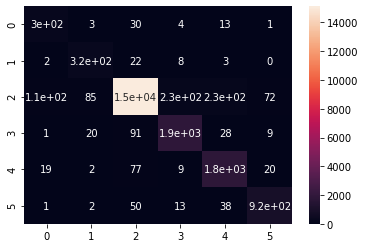

In [125]:
sns.heatmap(cm, annot=True)

In [87]:
mnb = MultinomialNB(alpha=.25)

In [106]:
model = fit_model_predict(mnb, tf_idf_train, tf_idf_test, y_train, y_test)

MultinomialNB(alpha=0.25)
train accuracy:  0.9811373437160674
test accuracy:  0.8920377867746289
train f1:  0.981276013471287
test f1:  0.8983848976597811


In [92]:
fit_model_predict(mnb, c_train, c_test, y_train, y_test)

MultinomialNB(alpha=0.25)
train accuracy:  0.8691248099773524
test accuracy:  0.8289357345618689
train f1:  0.8645410691322952
test f1:  0.8224256249072123


In [54]:
svc = SVC(random_state=10, class_weight='balanced')

In [55]:
fit_model_predict(svc, tf_idf_train, tf_idf_test, y_train, y_test)

SVC(class_weight='balanced', random_state=10)
train accuracy:  0.9941209319641361
test accuracy:  0.9007399134440877
train f1:  0.9941060694057255
test f1:  0.9063352165192762


In [56]:
fit_model_predict(svc, c_train, c_test, y_train, y_test)

SVC(class_weight='balanced', random_state=10)
train accuracy:  0.9744981850898148
test accuracy:  0.9288938526688073
train f1:  0.9742067901958676
test f1:  0.9293625133813325


In [ ]:
xgb = XGBClassifier()

In [ ]:
fit_model_predict(xgb, tf_idf_train, tf_idf_test, y_train, y_test)

In [ ]:
fit_model_predict(xgb, c_train, c_test, y_train, y_test)